https://github.com/wepe/MachineLearning/blob/master/ManifoldLearning/DimensionalityReduction_DataVisualizing/data_visualizing.py
https://zhuanlan.zhihu.com/p/43225794
Tf-idf : https://blog.csdn.net/gdkyxy2013/article/details/87905327


(901, 64)


Text(0.5,1,'A selection from the 64-dimensional digits dataset')

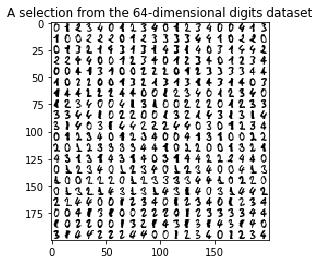

In [45]:
import sklearn.datasets as datasets
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from sklearn import (manifold, datasets, decomposition, ensemble, random_projection)
digits = datasets.load_digits(n_class=5)
X = digits.data
y = digits.target
print (X.shape)
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))
plt.imshow(img, cmap=plt.cm.binary)
plt.title('A selection from the 64-dimensional digits dataset')


In [41]:
def plot_embedding_3d(X, title=None):
    #坐标缩放到[0,1]区间
    x_min, x_max = np.min(X,axis=0), np.max(X,axis=0)
    X = (X - x_min) / (x_max - x_min)

    #降维后的坐标为（X[i, 0], X[i, 1],X[i,2]），在该位置画出对应的digits
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    for i in range(X.shape[0]):
        ax.text(X[i, 0], X[i, 1], X[i,2],str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if title is not None:
        plt.title(title)

In [18]:
def plot_embedding_2d(X, title=None):
    #坐标缩放到[0,1]区间
    x_min, x_max = np.min(X,axis=0), np.max(X,axis=0)
    X = (X - x_min) / (x_max - x_min)

    #降维后的坐标为（X[i, 0], X[i, 1]），在该位置画出对应的digits
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    for i in range(X.shape[0]):
        ax.text(X[i, 0], X[i, 1],str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if title is not None:
        plt.title(title)


In [20]:
print("Computing t-SNE embedding")

from sklearn import manifold
tsne = manifold.TSNE(n_components=3, init='pca', random_state=0)
t0 = time.time()
X_tsne = tsne.fit_transform(X)

Computing t-SNE embedding


In [33]:
X_tsne[3]

array([-26.425388,  13.720074,  29.77023 ], dtype=float32)

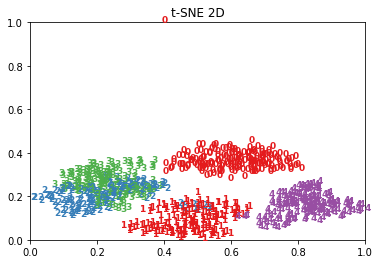

In [22]:
plot_embedding_2d(X_tsne[:,0:2],"t-SNE 2D")

In [28]:
import matplotlib;
print (matplotlib.__version__)

2.1.2


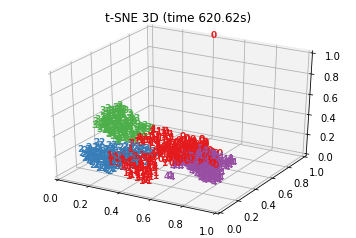

In [38]:
from mpl_toolkits.mplot3d import Axes3D
plot_embedding_3d(X_tsne,"t-SNE 3D (time %.2fs)" %(time.time() - t0))

Computing PCA projection


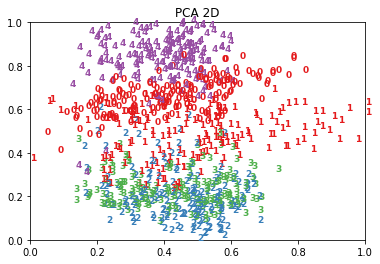

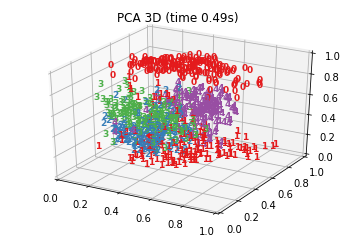

In [46]:
from time import time

print("Computing PCA projection")
t0 = time()
X_pca = decomposition.TruncatedSVD(n_components=3).fit_transform(X)
plot_embedding_2d(X_pca[:,0:2],"PCA 2D")
plot_embedding_3d(X_pca,"PCA 3D (time %.2fs)" %(time() - t0))

Computing Totally Random Trees embedding


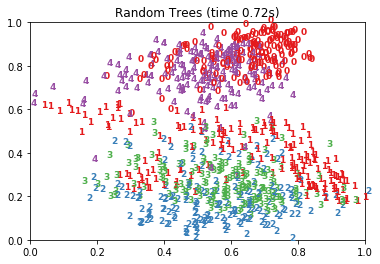

In [47]:
# Random Trees
print("Computing Totally Random Trees embedding")
hasher = ensemble.RandomTreesEmbedding(n_estimators=200, random_state=0,max_depth=5)
t0 = time()
X_transformed = hasher.fit_transform(X)
pca = decomposition.TruncatedSVD(n_components=2)
X_reduced = pca.fit_transform(X_transformed)

plot_embedding_2d(X_reduced,"Random Trees (time %.2fs)" %(time() - t0))